In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digits=load_digits()
x_data=digits.data
y_data=digits.target
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data)

In [3]:
x_data.shape

(1797, 64)

In [4]:
mlp=MLPClassifier(hidden_layer_sizes=(100,50),max_iter=500)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
def zeroMean(dataMat):
    meanVal=np.mean(dataMat,axis=0)
    newData=dataMat-meanVal
    return newData,meanVal
def pca(dataMat,top):
    newData,meanVal=zeroMean(dataMat)
    covMat=np.cov(newData,rowvar=0)
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))
    eigValIndice=np.argsort(eigVals)
    n_eigValIndice=eigValIndice[-1:-(top+1):-1]
    n_eigVect=eigVects[:,n_eigValIndice]
    lowDDateMat=newData*n_eigVect
    reconMat=(lowDDateMat*n_eigVect.T)+meanVal
    return lowDDateMat,reconMat

In [14]:
lowDDateMat,reconMat=pca(x_data,2)

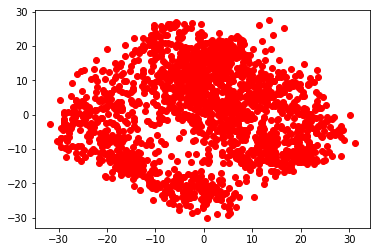

In [15]:
x=np.array(lowDDateMat)[:,0]
y=np.array(lowDDateMat)[:,1]
plt.scatter(x,y,c='r')
plt.show()

In [16]:
predictions=mlp.predict(x_data)

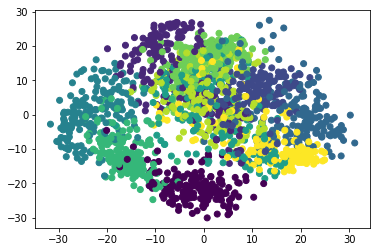

In [17]:
x=np.array(lowDDateMat)[:,0]
y=np.array(lowDDateMat)[:,1]
plt.scatter(x,y,c=y_data)
plt.show()

In [18]:
lowDDateMat,reconMat=pca(x_data,3)

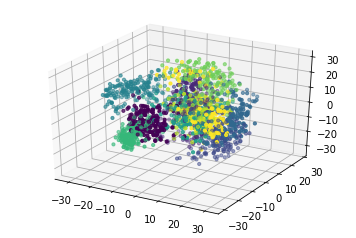

In [19]:
from mpl_toolkits.mplot3d import Axes3D
x=np.array(lowDDateMat)[:,0]
y=np.array(lowDDateMat)[:,1]
z=np.array(lowDDateMat)[:,2]
ax=plt.figure().add_subplot(111,projection='3d')
ax.scatter(x,y,z,c=y_data,s=10)
plt.show()